In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Deep-Packet


/content/drive/.shortcut-targets-by-id/10aOrnk1n0-0okyDsfE0pgH89Afwq2w05/Deep-Packet


In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/10aOrnk1n0-0okyDsfE0pgH89Afwq2w05/Deep-Packet


In [ ]:
!mkdir output

In [ ]:
!pip install scapy joblib click

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.3 MB/s eta 0:00:00
DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [ ]:
!python preprocessing.py --source ./pcaps --target ./output --njob 1


Processing pcaps/email1a.pcap
output/email1a.pcap.transformed Done
Processing pcaps/sftp1.pcap
output/sftp1.pcap.transformed Done
Processing pcaps/telegram_chat.pcap
output/telegram_chat.pcap.transformed Done
Processing pcaps/vpn_email2a.pcap
output/vpn_email2a.pcap.transformed Done
Processing pcaps/vpn_sftp_a.pcap
output/vpn_sftp_a.pcap.transformed Done
Processing pcaps/vpn_telegram_chat.pcap
output/vpn_telegram_chat.pcap.transformed Done
Processing pcaps/vpn_whatsapp_audio.pcap
output/vpn_whatsapp_audio.pcap.transformed Done
Processing pcaps/vpn_youtube_a.pcap
output/vpn_youtube_a.pcap.transformed Done
Processing pcaps/whatsapp_audio.pcap
output/whatsapp_audio.pcap.transformed Done
Processing pcaps/youtube1.pcap
output/youtube1.pcap.transformed Done


In [ ]:
!python create_train_test_set.py -s ./output -t ./train_test_data

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/04 20:43:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
processing traffic classification dataset
splitting train test
splitting train test done
saving train
saving train done
saving test
saving test done
train_test_data/application_classification/train.parquet
Traceback (most recent call last):
  File "/content/drive/MyDrive/Deep-Packet/create_train_test_set.py", line 167, in <module>
    main()
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1161, in __call__
    return self.main(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1082, in main
    rv = self.invoke(ctx)
         ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1443, in invoke


In [ ]:
!pip install pip==23.3.1
!pip install pytorch-lightning==1.5.10
!pip install datasets

DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Using cached datasets-3.5.1-py3-none-any.whl.metadata (19 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached xxhash-3.5.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Us

In [ ]:
cd /content/drive/MyDrive/Deep-Packet

/content/drive/MyDrive/Deep-Packet


In [ ]:
!python train_cnn.py -d train_test_data/traffic_classification/train.parquet -m model/traffic_classification.cnn.model -t traffic

2025-05-04 20:58:28.216772: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746392308.243558   61413 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746392308.251198   61413 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Global seed set to 9876
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/core/lightning.py:2054: DeprecationWarning: `torch.distributed._sharded_tensor` will be deprecated, use `torch.distributed._shard.sharded_tensor` instead
  from torch.distributed._sharded_tensor import pre_load_state_dict_hook, state_dict_hook
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


In [ ]:
!pwd


/content/drive/.shortcut-targets-by-id/10aOrnk1n0-0okyDsfE0pgH89Afwq2w05/Deep-Packet


In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from ml.utils import  load_traffic_classification_cnn_model, normalise_cm
from ml.metrics import confusion_matrix, get_classification_report
import importlib
import utils
importlib.reload(utils)
from utils import ID_TO_TRAFFIC

In [ ]:
# plot dpi
mpl.rcParams['figure.dpi'] = 300
traffic_classification_cnn_model_path = 'model/traffic_classification.cnn.model'
traffic_classification_test_data_path = 'train_test_data/traffic_classification/test.parquet'

In [ ]:
traffic_classification_cnn = load_traffic_classification_cnn_model(traffic_classification_cnn_model_path, gpu=False)

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/core/lightning.py:2054: DeprecationWarning: `torch.distributed._sharded_tensor` will be deprecated, use `torch.distributed._shard.sharded_tensor` instead
  from torch.distributed._sharded_tensor import pre_load_state_dict_hook, state_dict_hook


In [ ]:
import numpy as np
np.float = float

In [ ]:
traffic_cnn_cm = confusion_matrix(
    data_path=traffic_classification_test_data_path,
    model=traffic_classification_cnn,
    num_class=len(ID_TO_TRAFFIC)
)

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix2(cm, labels):
    normalised_cm = normalise_cm(cm)
    fig, ax = plt.subplots(figsize=(12, 12))

    sns.heatmap(
        data=normalised_cm,
        cmap='RdBu',
        xticklabels=labels,
        yticklabels=labels,
        annot=True,
        fmt='.2f',
        ax=ax,
        center=0.5
    )

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    plt.title("Normalized Confusion Matrix (Red=High, Blue=Low)", fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
def plot_confusion_matrix(cm, labels):
    normalised_cm = normalise_cm(cm)
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(
        data=normalised_cm, cmap='YlGnBu',
        xticklabels=labels, yticklabels=labels,
        annot=True, ax=ax, fmt='.2f'
    )
    ax.set_xlabel('Predict labels')
    ax.set_ylabel('True labels')
    fig.show()

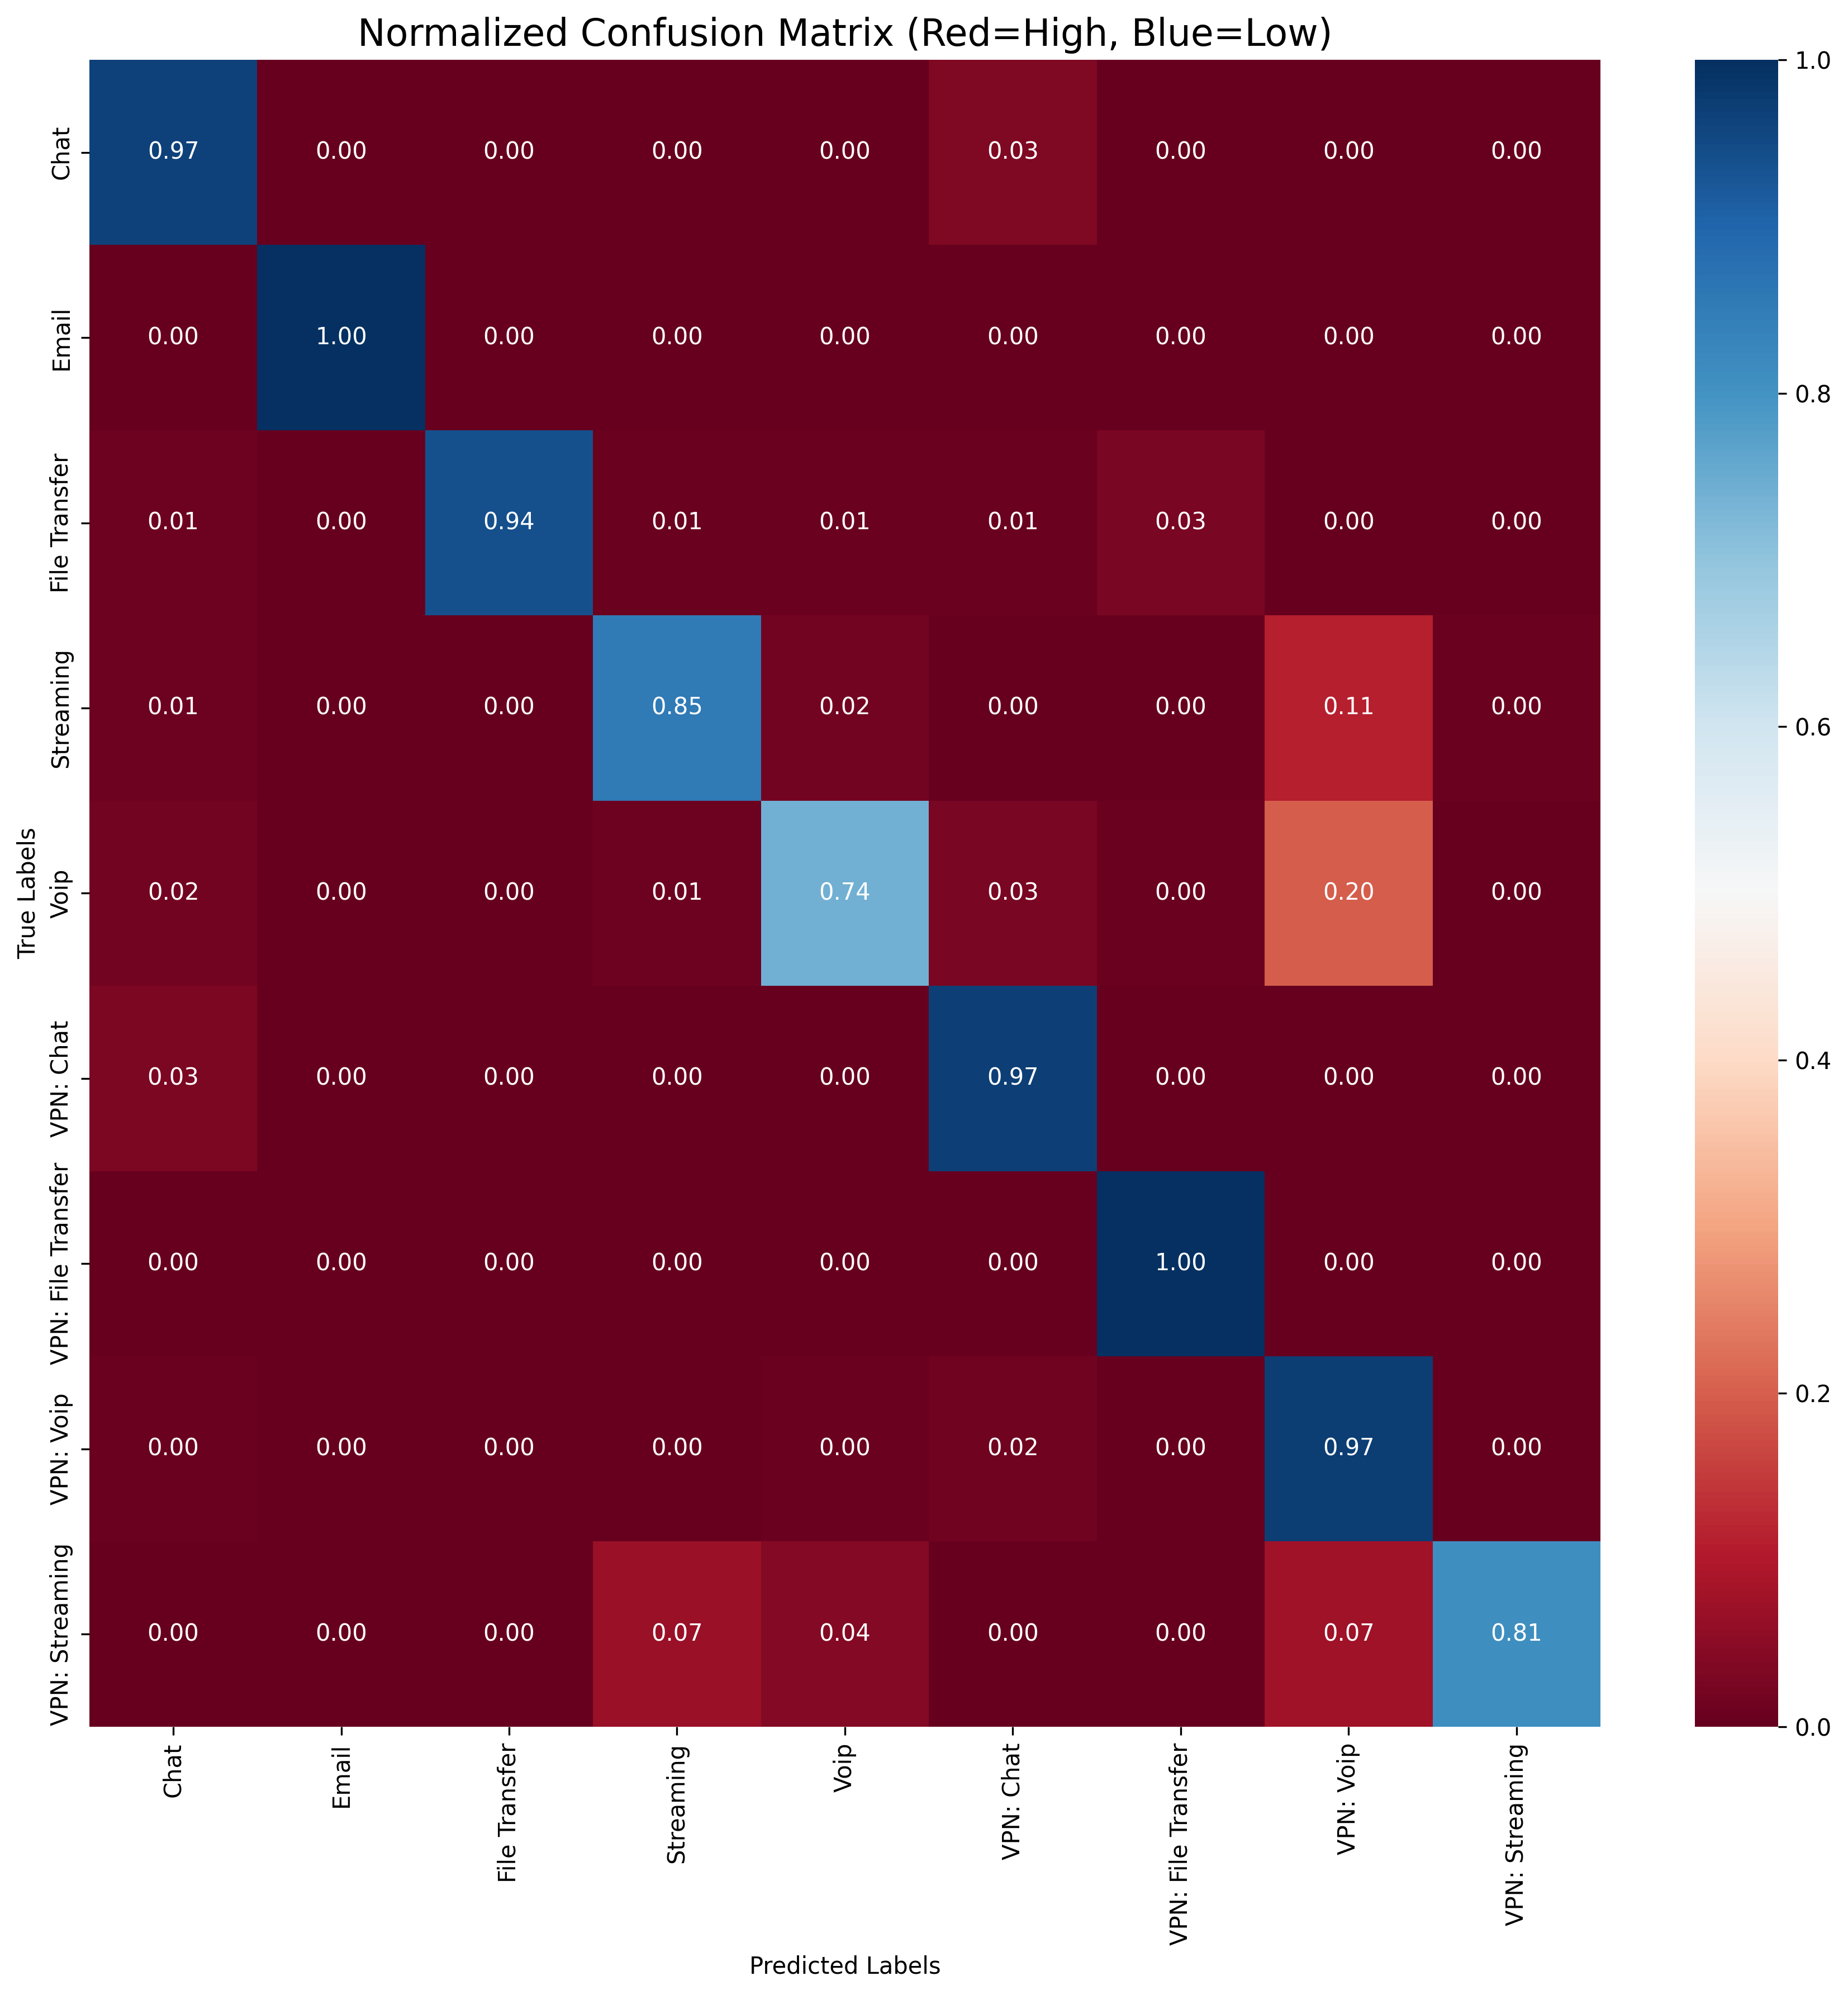

In [ ]:
traffic_labels = []
for i in sorted(list(ID_TO_TRAFFIC.keys())):
    traffic_labels.append(ID_TO_TRAFFIC[i])

plot_confusion_matrix2(traffic_cnn_cm, traffic_labels)

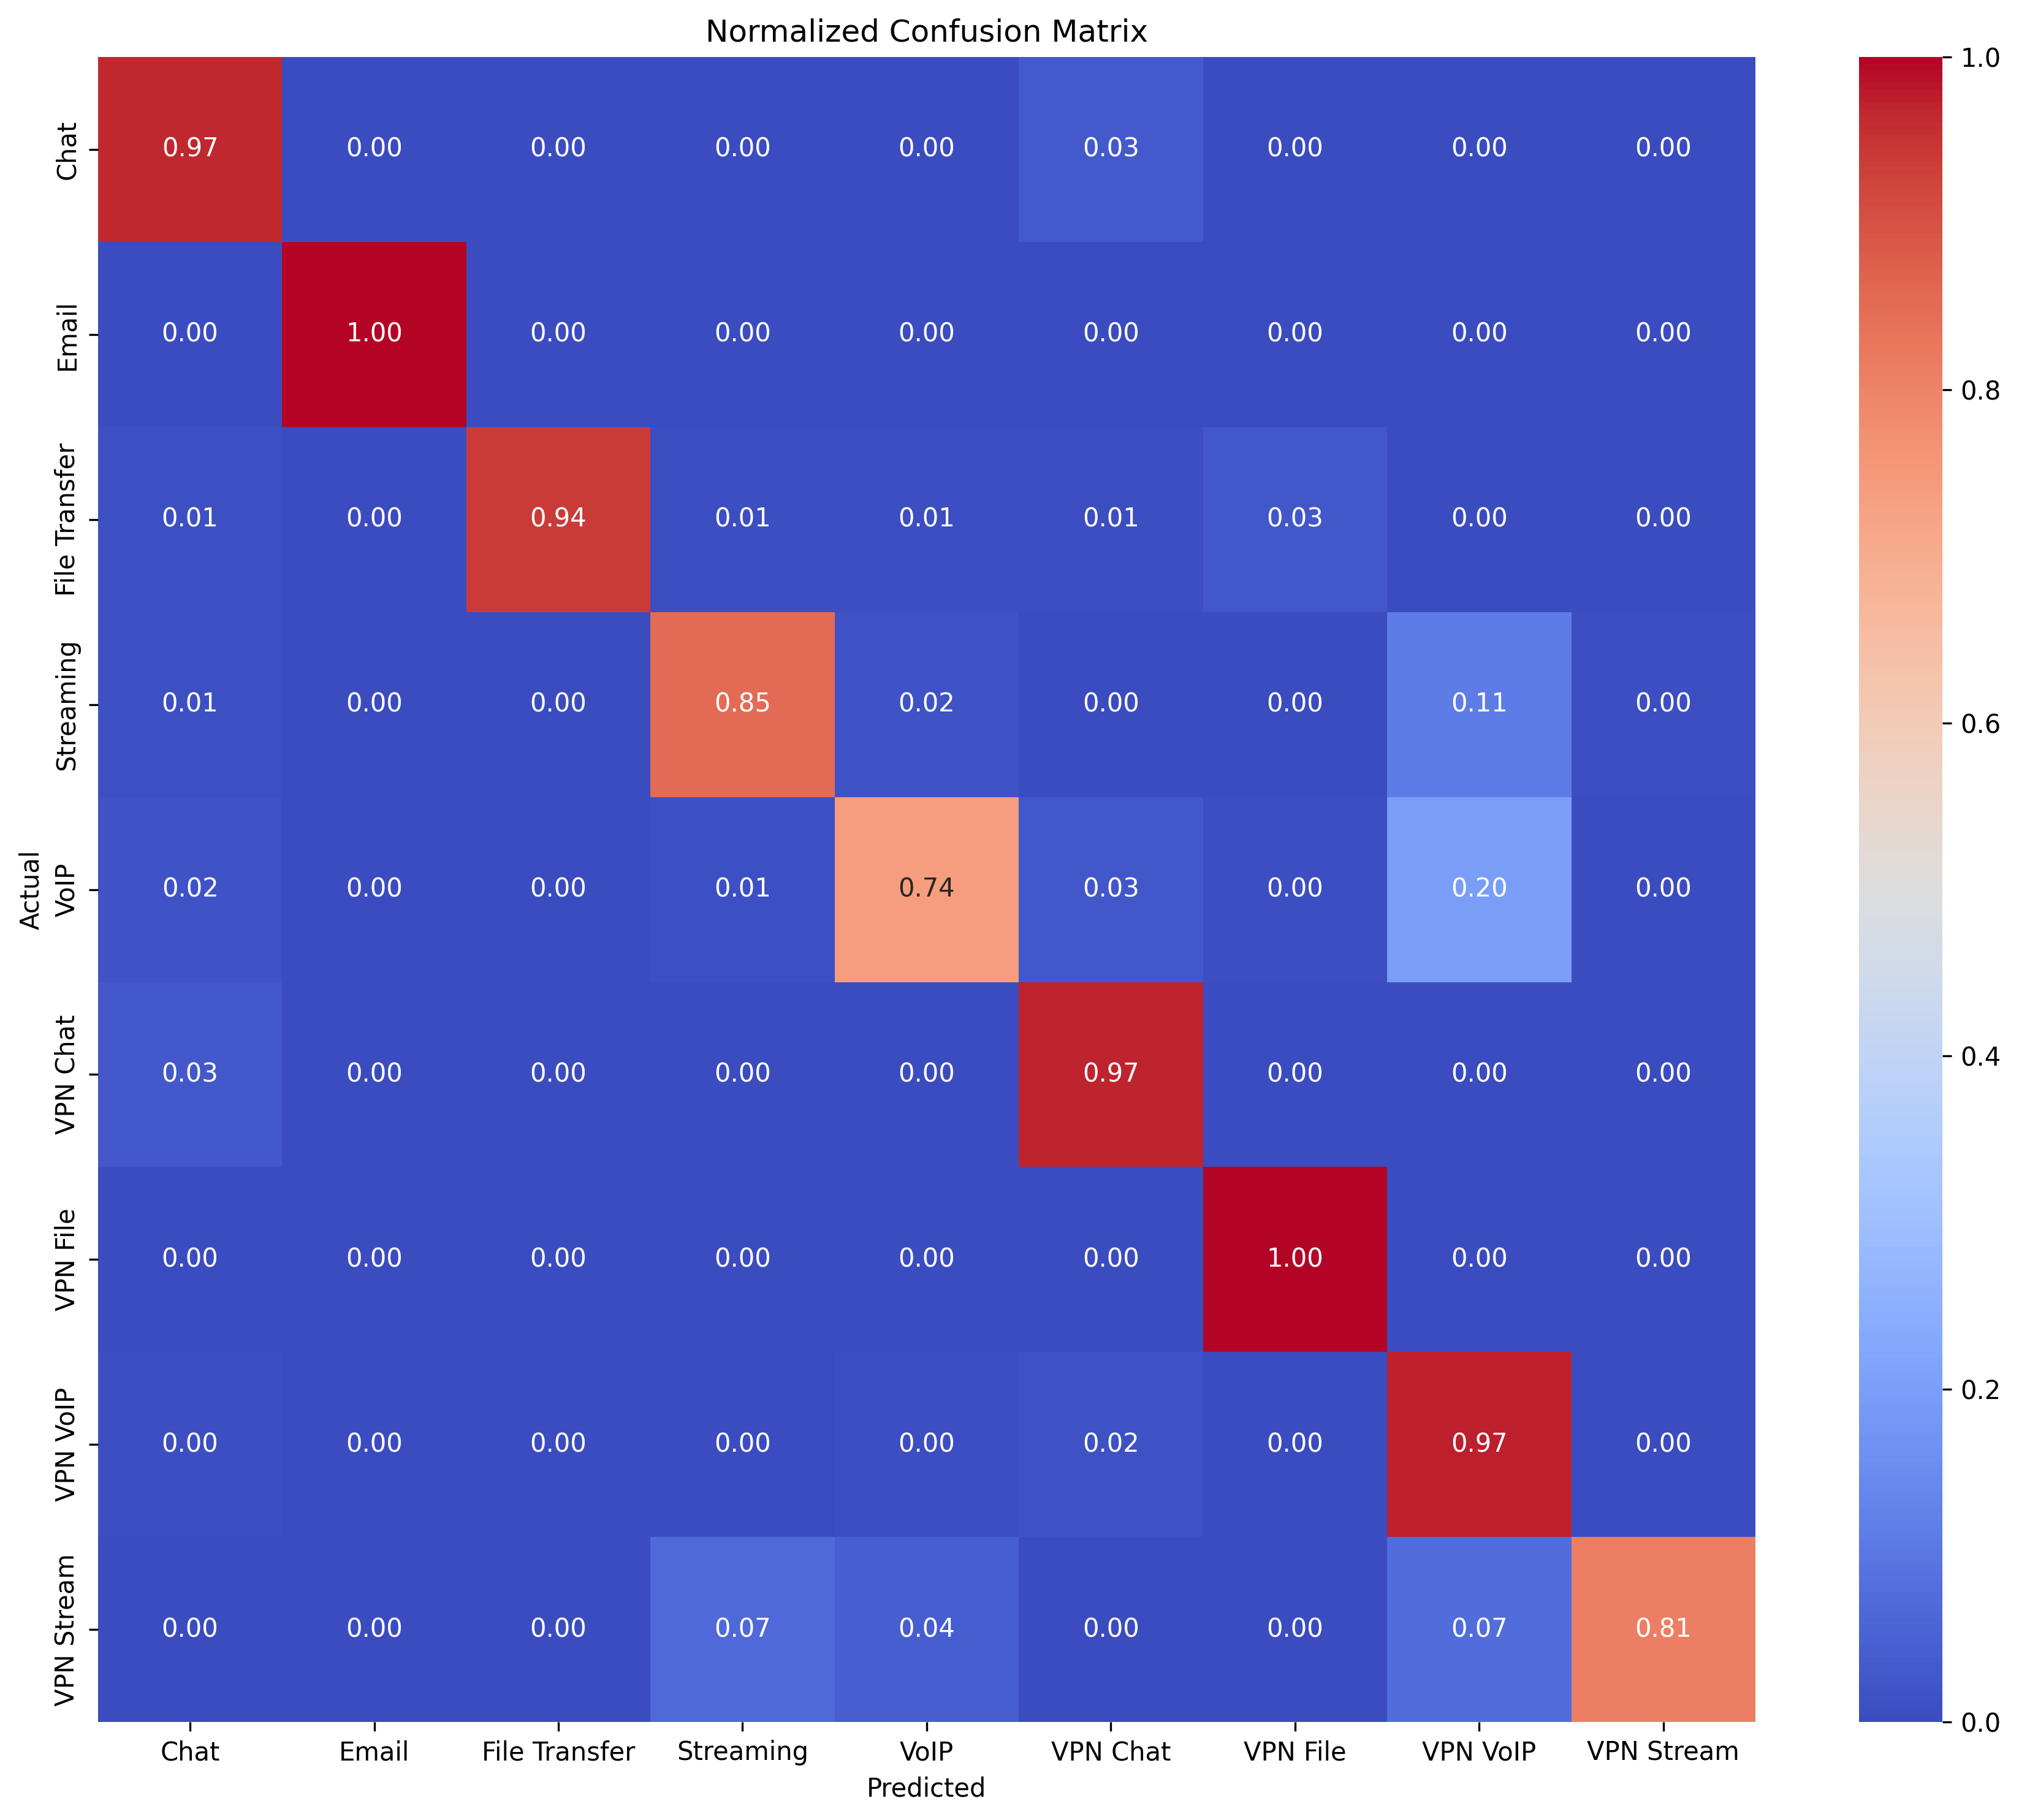

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, labels):
    norm_cm = normalise_cm(cm)
    plt.figure(figsize=(12, 10))
    sns.heatmap(norm_cm, annot=True, cmap='coolwarm', fmt='.2f',
                xticklabels=labels, yticklabels=labels, center=0.5)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Normalized Confusion Matrix")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(traffic_cnn_cm, traffic_labels)


<ipython-input-36-a3b92559a699>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=per_class_acc, palette="viridis")


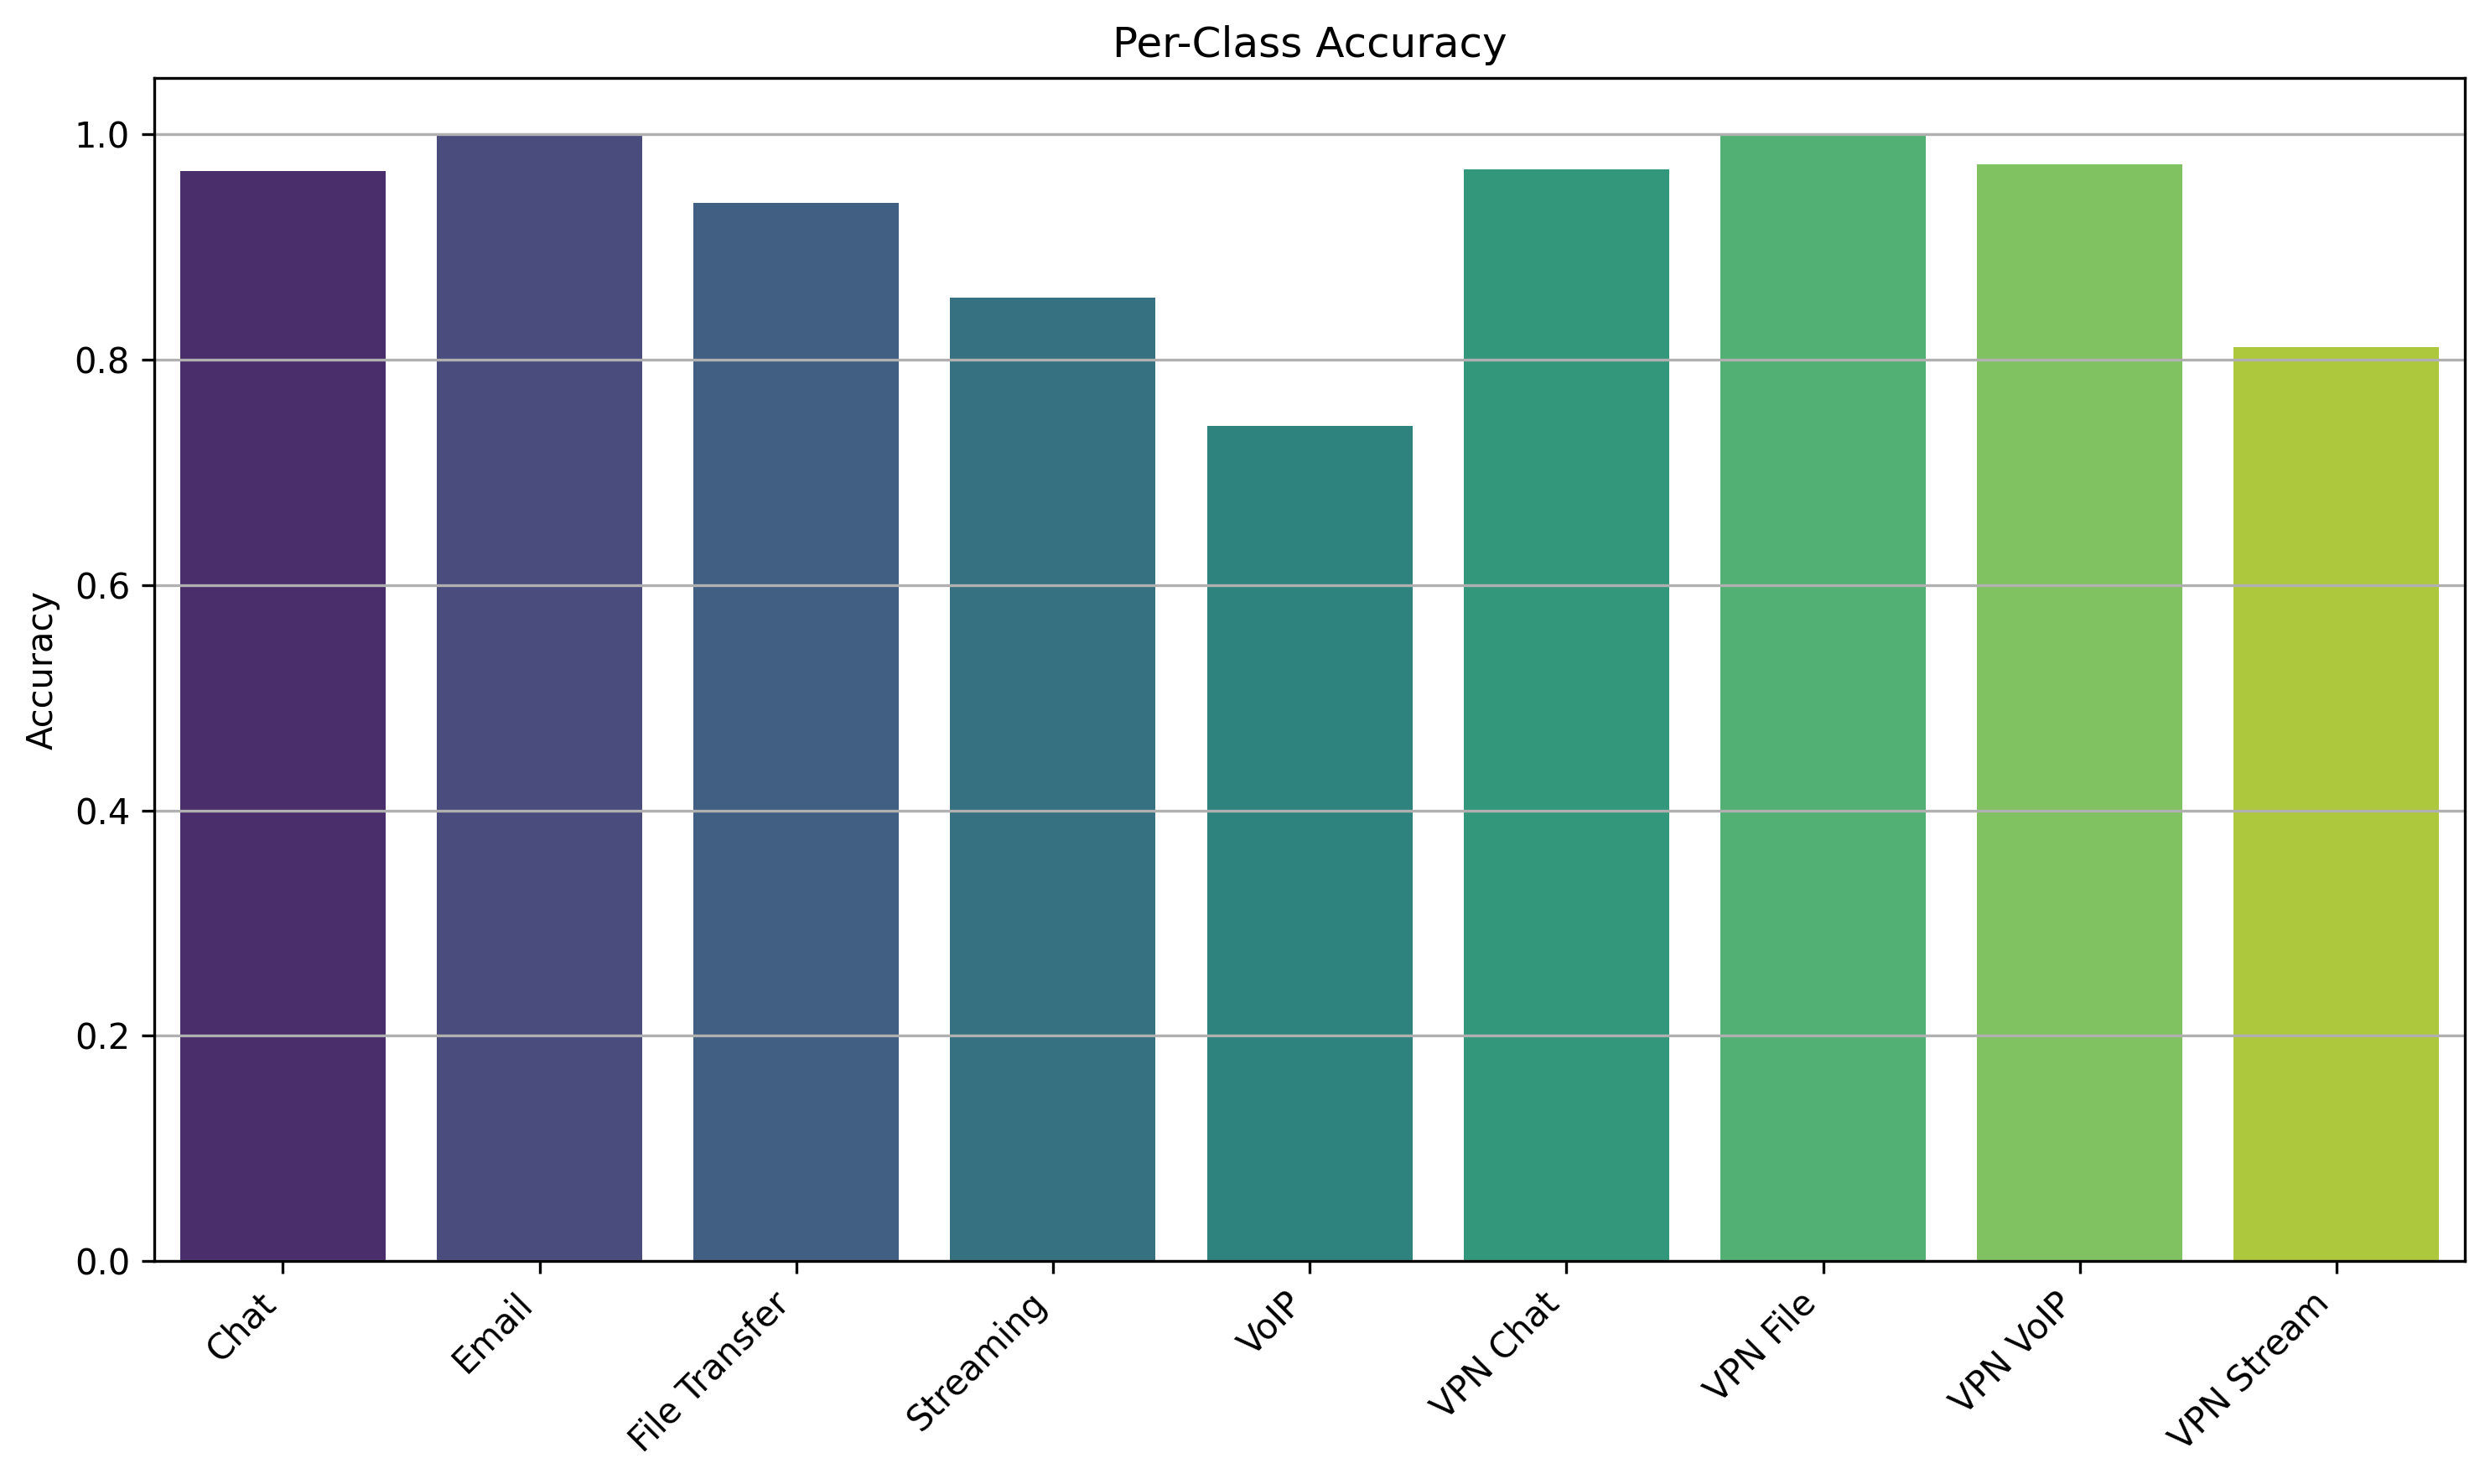

In [ ]:
import numpy as np

def plot_per_class_accuracy(cm, labels):
    norm_cm = normalise_cm(cm)
    per_class_acc = np.diag(norm_cm)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=labels, y=per_class_acc, palette="viridis")
    plt.ylim(0, 1.05)
    plt.title("Per-Class Accuracy")
    plt.ylabel("Accuracy")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_per_class_accuracy(traffic_cnn_cm, traffic_labels)


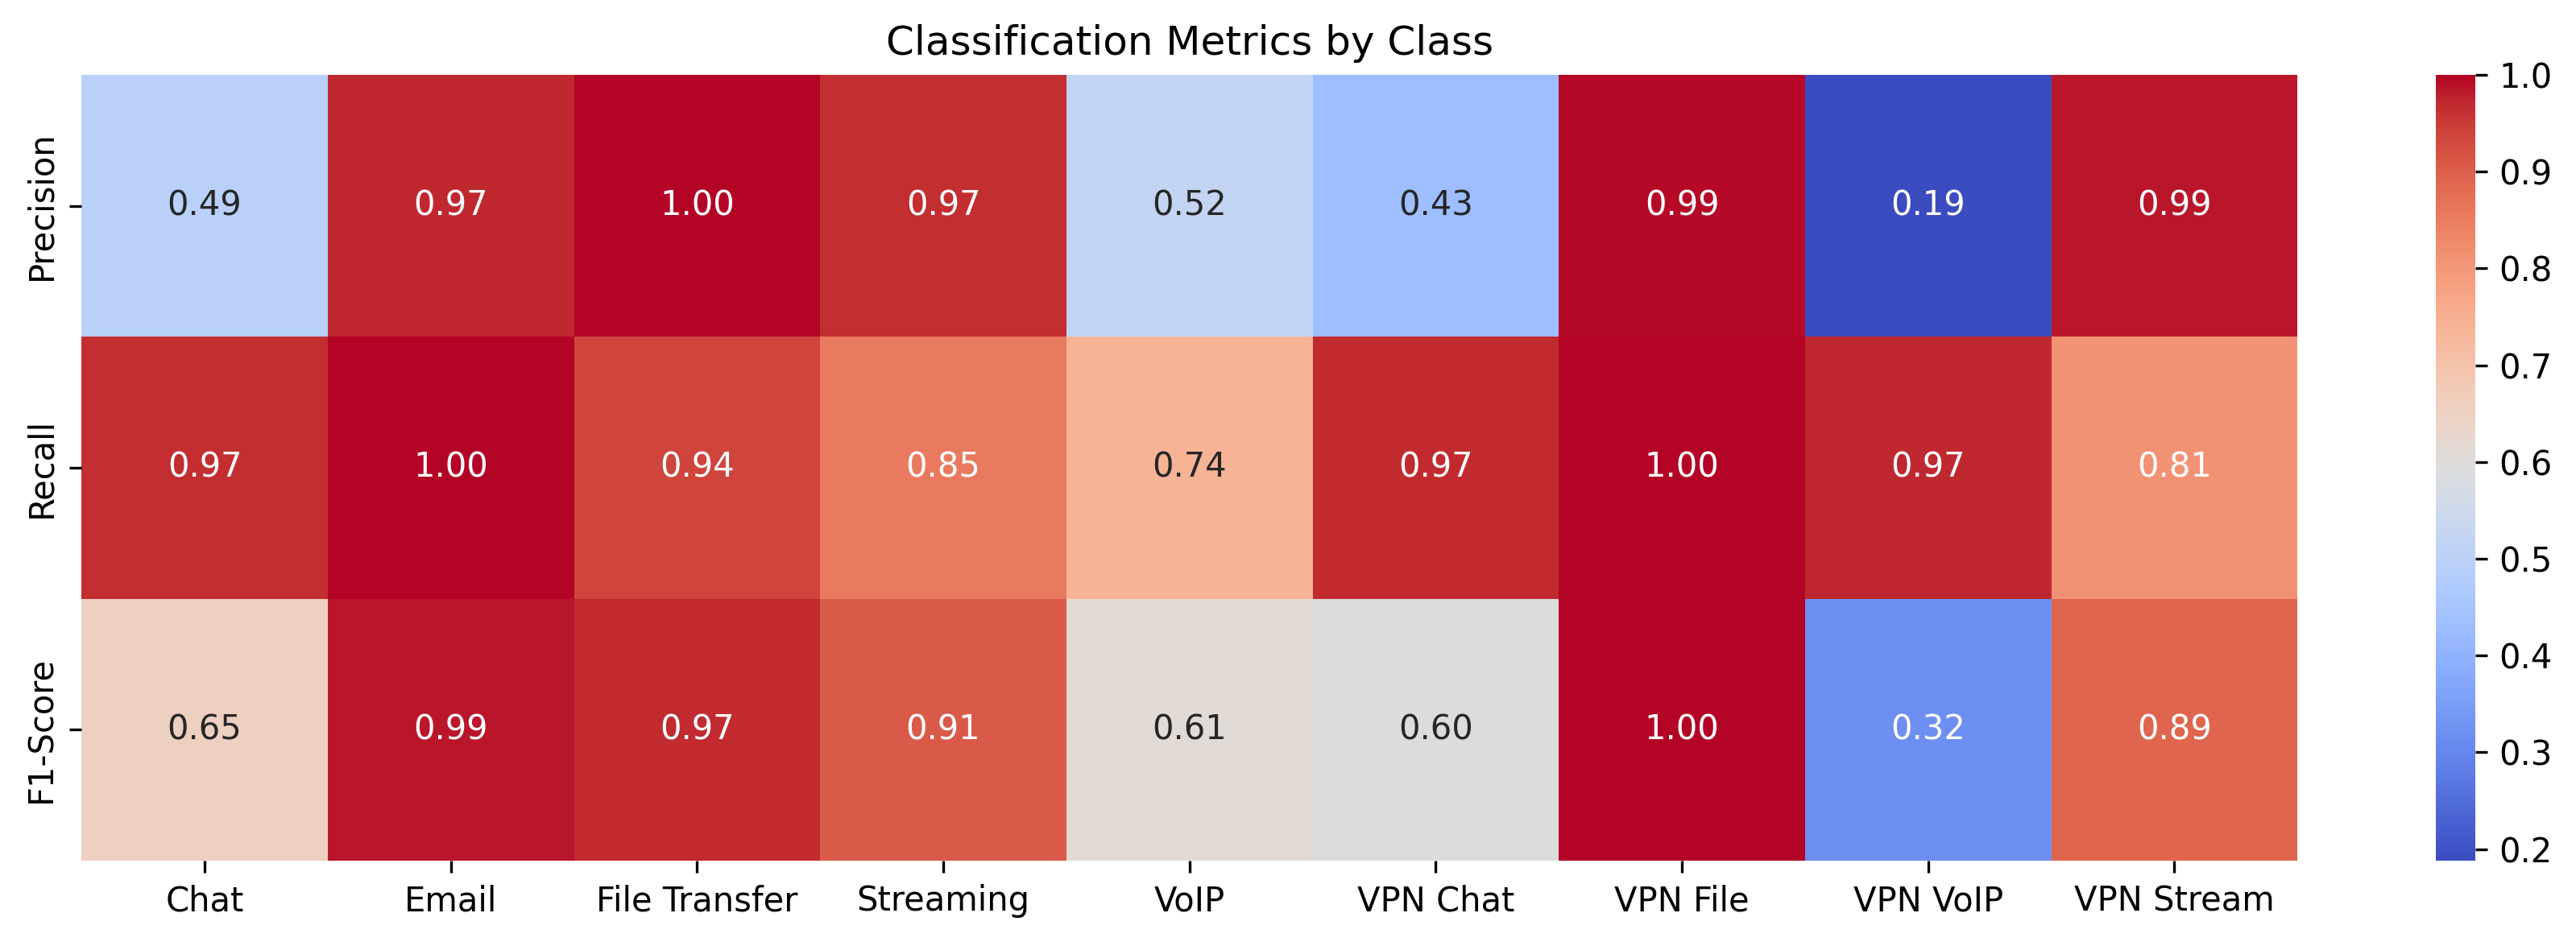

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def plot_prf_heatmap(cm, labels):
    y_true = []
    y_pred = []

    for i in range(len(cm)):
        for j in range(len(cm)):
            y_true += [i] * cm[i][j]
            y_pred += [j] * cm[i][j]

    precision = precision_score(y_true, y_pred, average=None, zero_division=0)
    recall = recall_score(y_true, y_pred, average=None, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=None, zero_division=0)

    metrics = np.vstack([precision, recall, f1])

    plt.figure(figsize=(12, 4))
    sns.heatmap(metrics, annot=True, cmap="coolwarm", fmt=".2f",
                xticklabels=labels,
                yticklabels=["Precision", "Recall", "F1-Score"])
    plt.title("Classification Metrics by Class")
    plt.tight_layout()
    plt.show()

plot_prf_heatmap(traffic_cnn_cm, traffic_labels)


In [ ]:
def print_top_confusions(cm, labels, top_k=5):
    cm_copy = cm.copy()
    np.fill_diagonal(cm_copy, 0)
    flat = cm_copy.flatten()
    top_indices = flat.argsort()[-top_k:][::-1]

    print(f" Top {top_k} Confused Class Pairs:")
    for idx in top_indices:
        i, j = divmod(idx, cm.shape[1])
        print(f"{labels[i]} → {labels[j]}: {cm[i][j]} times")

print_top_confusions(traffic_cnn_cm, traffic_labels, top_k=5)


 Top 5 Confused Class Pairs:
Streaming → VPN VoIP: 2631 times
VPN Stream → VPN VoIP: 728 times
VPN Stream → Streaming: 656 times
Streaming → VoIP: 417 times
VPN Stream → VoIP: 404 times


In [ ]:
from sklearn.metrics import classification_report

def print_classification_report(cm, labels):
    y_true = []
    y_pred = []
    for i in range(len(cm)):
        for j in range(len(cm)):
            y_true += [i] * cm[i][j]
            y_pred += [j] * cm[i][j]

    print(classification_report(y_true, y_pred, target_names=labels, zero_division=0))

print_classification_report(traffic_cnn_cm, traffic_labels)


               precision    recall  f1-score   support

         Chat       0.49      0.97      0.65       367
        Email       0.97      1.00      0.99      1310
File Transfer       1.00      0.94      0.97      2492
    Streaming       0.97      0.85      0.91     23943
         VoIP       0.52      0.74      0.61      1241
     VPN Chat       0.43      0.97      0.60        97
     VPN File       0.99      1.00      1.00     15042
     VPN VoIP       0.19      0.97      0.32       860
   VPN Stream       0.99      0.81      0.89      9806

     accuracy                           0.89     55158
    macro avg       0.73      0.92      0.77     55158
 weighted avg       0.95      0.89      0.92     55158



In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset

class TrafficDataset(Dataset):
    def __init__(self, parquet_path):
        df = pd.read_parquet(parquet_path)

        # Unpack object features into fixed-length vectors
        features = []
        for row in df["feature"]:
            features.append(np.array(row, dtype=np.float32))  # each row should be a list or np.array

        self.X = torch.tensor(np.stack(features), dtype=torch.float32)
        self.y = torch.tensor(df["label"].values, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [ ]:
dataset = TrafficDataset('train_test_data/traffic_classification/test.parquet')
loader = DataLoader(dataset, batch_size=128, shuffle=False)

y_true = []
y_pred = []
y_probs = []

traffic_classification_cnn.eval()

with torch.no_grad():
    for X, y in loader:
        X = X.unsqueeze(1)
        logits = traffic_classification_cnn(X)

        probs = torch.softmax(logits, dim=1)
        pred = torch.argmax(probs, dim=1)

        y_true.extend(y.numpy())
        y_pred.extend(pred.numpy())
        y_probs.extend(probs.numpy())

y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_probs = np.array(y_probs)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confidence_histogram(y_true, y_pred, y_probs):

    confidences = np.max(y_probs, axis=1)
    correct_mask = (y_pred == y_true)
    incorrect_mask = ~correct_mask


    plt.figure(figsize=(10, 6))
    sns.histplot(confidences[correct_mask], color='green', label='Correct', bins=30, kde=True, stat='density')
    sns.histplot(confidences[incorrect_mask], color='red', label='Incorrect', bins=30, kde=True, stat='density')

    plt.title('Prediction Confidence Distribution')
    plt.xlabel('Confidence (Softmax Score of Predicted Class)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


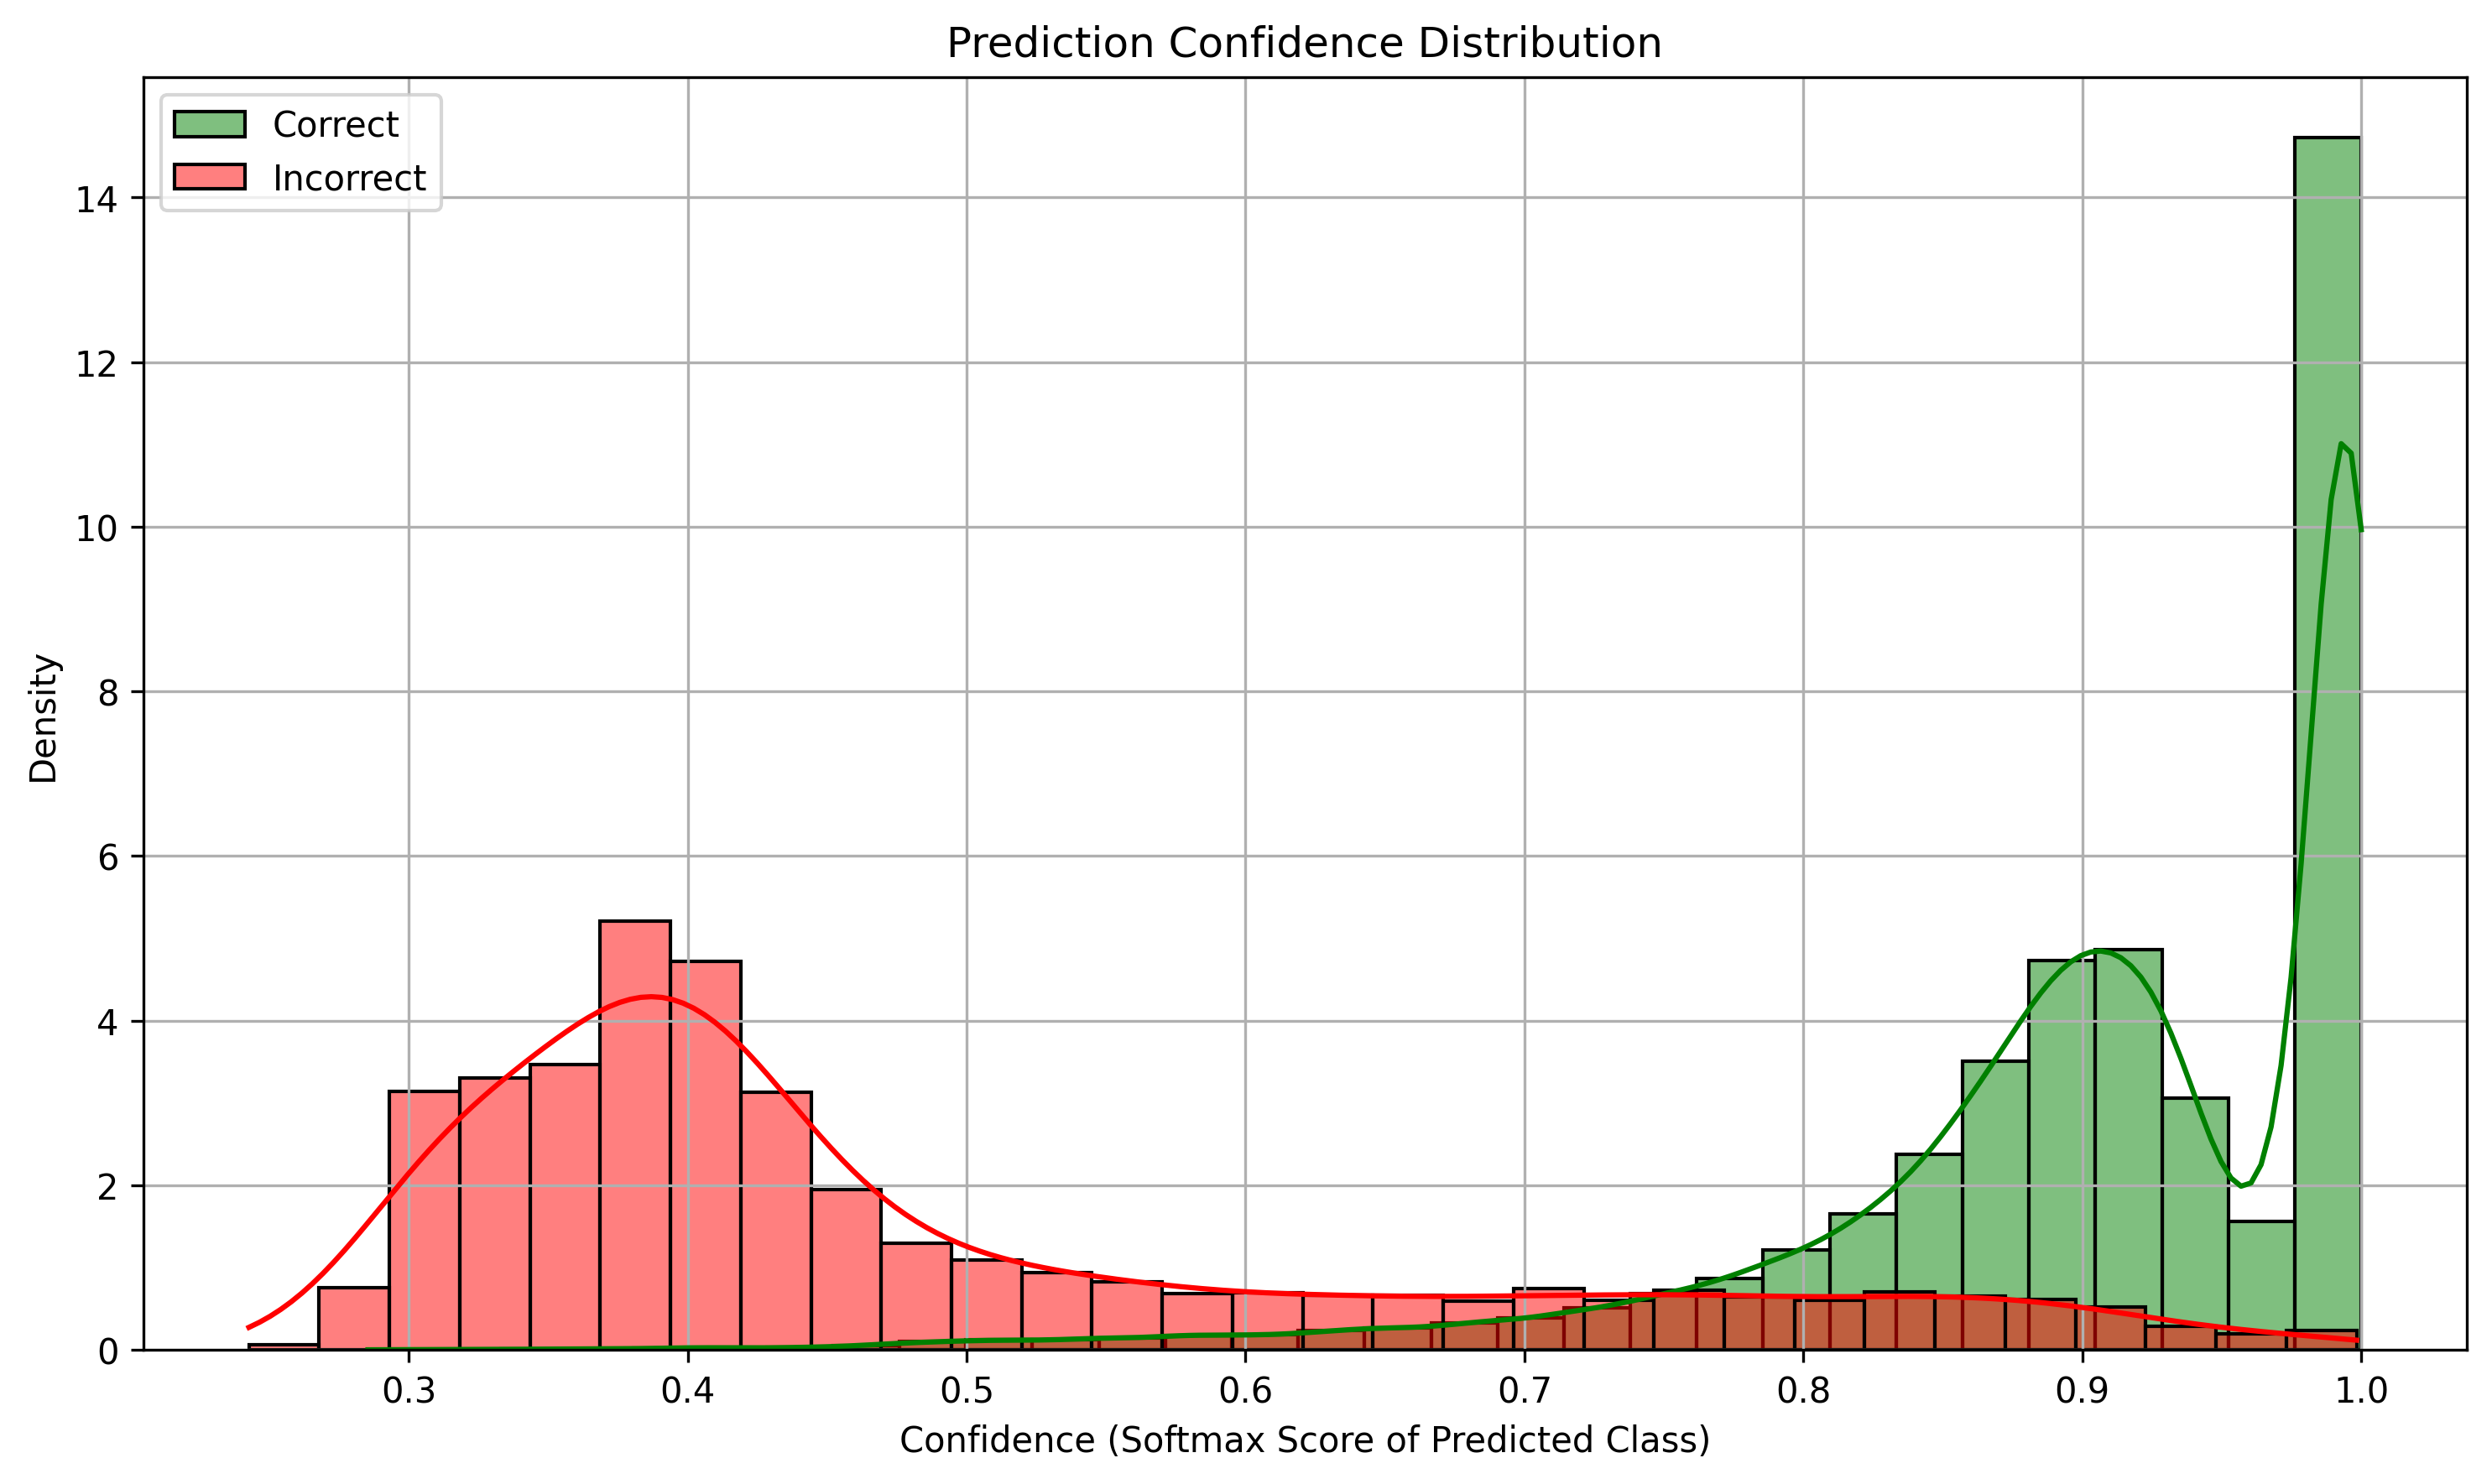

In [ ]:
plot_confidence_histogram(y_true, y_pred, y_probs)


# Model Evaluation Report: Deep-Learning-Based VPN and Non-VPN Network Traffic Classification

---

## Overall Accuracy and Summary

- **Total Test Samples:** 55,158
- **Overall Accuracy:** 89%
- **Weighted F1-Score:** 0.92
- **Macro-Averaged Metrics:**
  - Precision: 0.73
  - Recall: 0.92
  - F1-Score: 0.77

The model demonstrates strong performance on most classes, particularly for high-volume categories such as `Streaming`, `Email`, and `VPN File`. Precision and recall are generally well-balanced, with notable exceptions in a few VPN traffic types.

---

## Confidence Distribution Analysis

A confidence histogram was generated by plotting softmax probabilities of the predicted class for both correct and incorrect predictions:

- **Correct predictions** are mostly concentrated around high confidence scores (0.9–1.0), indicating well-calibrated behavior for those predictions.
- **Incorrect predictions** tend to occur at lower confidence levels (0.3–0.6), suggesting the model is aware of its uncertainty in many misclassifications.
- There is minimal overlap between the distributions, showing that confidence can serve as a useful signal for post-processing strategies like abstention, thresholding, or human-in-the-loop systems.

---

## Class-wise Precision, Recall, and F1-Score

| Class           | Precision | Recall | F1-Score | Support |
|------------------|-----------|--------|----------|---------|
| Chat             | 0.49      | 0.97   | 0.65     | 367     |
| Email            | 0.97      | 1.00   | 0.99     | 1310    |
| File Transfer    | 1.00      | 0.94   | 0.97     | 2492    |
| Streaming        | 0.97      | 0.85   | 0.91     | 23943   |
| VoIP             | 0.52      | 0.74   | 0.61     | 1241    |
| VPN Chat         | 0.43      | 0.97   | 0.60     | 97      |
| VPN File         | 0.99      | 1.00   | 1.00     | 15042   |
| VPN VoIP         | 0.19      | 0.97   | 0.32     | 860     |
| VPN Stream       | 0.99      | 0.81   | 0.89     | 9806    |

- **VPN VoIP** is the most error-prone class with low precision (0.19), indicating frequent false positives.
- **VPN File** and **Email** classes are near-perfect, with excellent generalization even under VPN encryption.
- **Streaming** and **VoIP** maintain good recall but show a drop in precision, reflecting confusion with adjacent classes.

---

## Top Confusion Pairs

| Actual → Predicted         | Count |
|----------------------------|-------|
| Streaming → VPN VoIP       | 2631  |
| VPN Stream → VPN VoIP      | 728   |
| VPN Stream → Streaming     | 656   |
| Streaming → VoIP           | 417   |
| VPN Stream → VoIP          | 404   |

These misclassifications reveal that the model struggles to distinguish between encrypted streaming and VoIP-style traffic. Many of these classes share temporal and frequency-based characteristics, especially when tunneled through VPN.

---

## Key Observations

- The model performs exceptionally well on clearly separable classes like `Email` and `VPN File`.
- Misclassifications are concentrated around a few overlapping traffic types such as `Streaming`, `VoIP`, and `VPN VoIP`.
- Confidence scores correlate well with prediction correctness, making them viable for calibration-based filtering or rejection mechanisms.

---

